In [40]:
import importlib
import src.utils as utils
import src.gtfs_handler as gtfs_handler
import src.gps_handler as gps_handler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numba import jit

importlib.reload(utils)
importlib.reload(gtfs_handler)
importlib.reload(gps_handler)


<module 'src.gps_handler' from 'c:\\Users\\almir\\OneDrive\\Área de Trabalho\\FGV\\5° Período\\Field\\smtr_previsao_tempo_chegada\\fgv\\src\\gps_handler.py'>

In [41]:
# Define the paths to the GTFS and GPS data
GTFS_FOLDER = "./data/gtfs_data"
GPS_FOLDER = "./data/gps_data"

# Define the route to be analyzed
ROUTE = "409"
VEHICLE = "A71551"

In [42]:
# Create the GTFS and GPS handlers
gtfs = gtfs_handler.GTFSHandler(GTFS_FOLDER)
gps = gps_handler.GPSHandler(GPS_FOLDER)
gps.load_data()

GTFS data loaded successfully!
Loading GPS data from 7 CSV files...
GPS data loaded successfully!


In [43]:
gtfs.filter_by_route(ROUTE)

print("Route stops:")
gtfs.route_stops

Filtering the data by the route 409...
DF ROUTE ID HEAD:        route_id  agency_id route_short_name     route_long_name route_desc  \
312  O0409AAA0A      22002              409  Saens Peña - Horto        NaN   

     route_type route_color route_text_color fare_id  
312         700      FCC417           000000     NaN  
Route stops:


,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [44]:
gtfs.route_shape_ids

array(['gnoq', 'wrbl'], dtype=object)

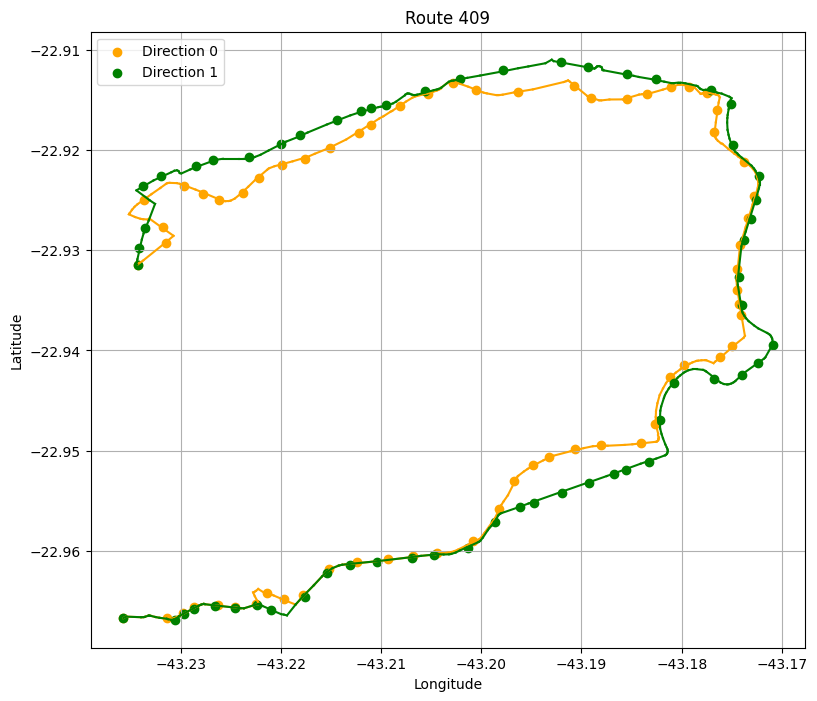

In [45]:
# Plot the route and the stops, colored by the direction
gtfs.plot_route("Route 409")

In [46]:
gps.show_routes()

servico
409    350089
Name: count, dtype: int64
Found 1 routes:
[409]


array([409], dtype=int64)

In [47]:
gps.get_route_data(409)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia
0,2024-03-17 00:04:25,2024-03-17,00:04:25,A71550,409,-22.88897,-43.29311,False,garagem,Parado garagem,0,0.0,NaN
1,2024-03-17 00:06:27,2024-03-17,00:06:27,A71505,409,-22.88866,-43.29309,False,garagem,Parado garagem,0,0.0,NaN
2,2024-03-17 00:07:24,2024-03-17,00:07:24,A71541,409,-22.88952,-43.29236,False,garagem,Parado garagem,0,0.0,NaN
3,2024-03-17 00:09:11,2024-03-17,00:09:11,A71518,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,NaN
4,2024-03-17 00:12:01,2024-03-17,00:12:01,A71519,409,-22.88834,-43.29304,False,garagem,Parado garagem,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350084,2024-03-23 23:50:40,2024-03-23,23:50:40,A71550,409,-22.88997,-43.29243,False,garagem,Parado garagem,0,0.0,0.0
350085,2024-03-23 23:50:43,2024-03-23,23:50:43,A71579,409,-22.88849,-43.29313,False,garagem,Parado garagem,0,0.0,0.0
350086,2024-03-23 23:51:43,2024-03-23,23:51:43,A71531,409,-22.88892,-43.29305,False,garagem,Parado garagem,0,0.0,0.0
350087,2024-03-23 23:53:27,2024-03-23,23:53:27,A71503,409,-22.88901,-43.29320,False,garagem,Parado garagem,0,0.0,0.0


In [48]:
gps.show_buses(ROUTE, filter_min=1000, filter_max=2880)

Route 409 has 2/31 elegible buses:
['A71540', 'A71630']


['A71540', 'A71630']

In [49]:
# Filter the data according to the vehicle id
gps.get_bus_data(VEHICLE)
gps.gps_df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,0,0.0,NaN
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,0,0.2,1.111951
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,0,0.1,1.511676
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,0,0.3,4.244541
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,0,0.3,3.267263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,2024-03-23 21:49:29,2024-03-23,21:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,1.024398
14153,2024-03-23 22:19:29,2024-03-23,22:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000
14154,2024-03-23 22:49:29,2024-03-23,22:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000
14155,2024-03-23 23:19:29,2024-03-23,23:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000


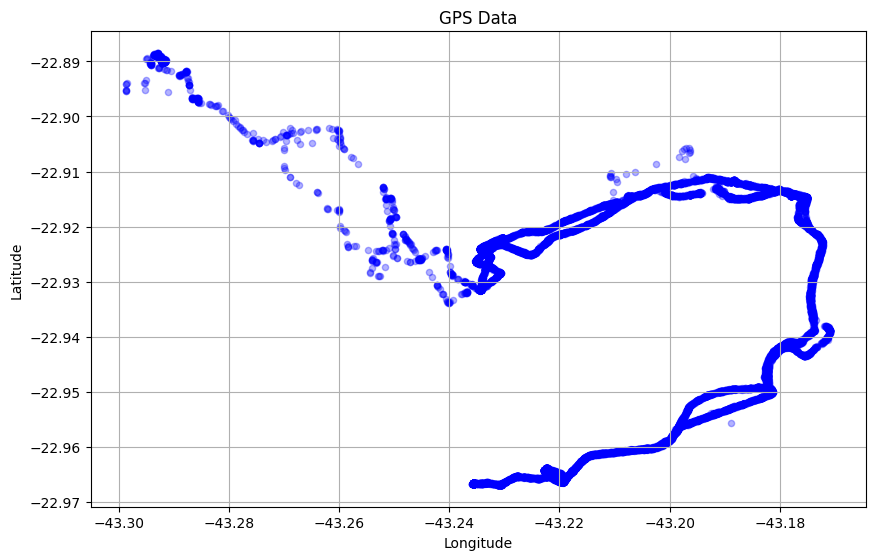

In [50]:
# Plot the gps data as a scatter plot
gps.plot_gps_data()

In [51]:
print(f"EVALUATING {len(gps.gps_df)} gps points over {len(gtfs.route_shape_segments)} route segments")
gps.filter_gps_coordinates(gtfs)
gps.gps_df

print("\nRESULTS AFTER FILTERING")
print(gps.gps_df["in_route"].value_counts())

EVALUATING 14157 gps points over 613 route segments

RESULTS AFTER FILTERING
in_route
True     13342
False      815
Name: count, dtype: int64


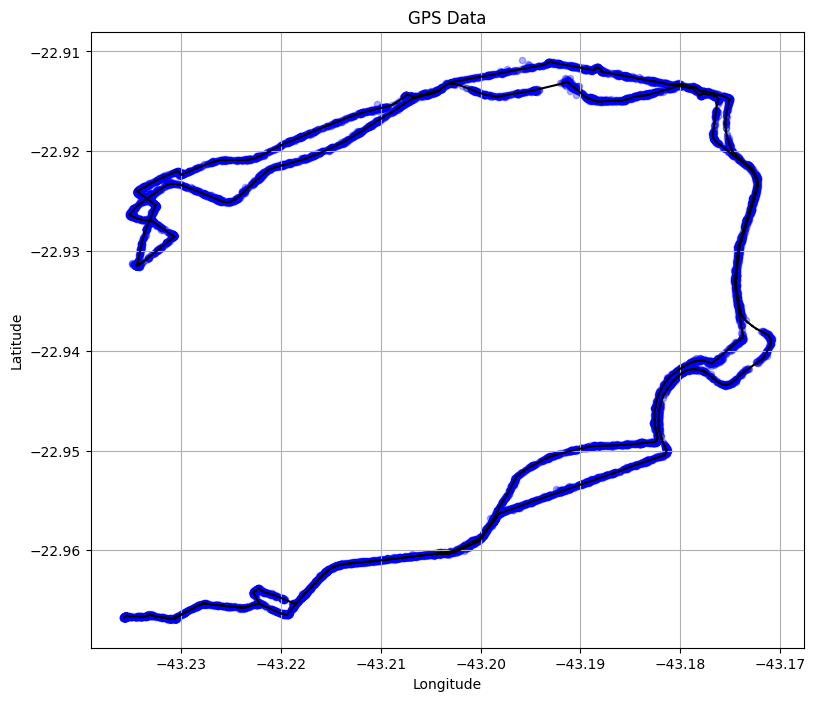

In [52]:
gps.plot_gps_data(gps.gps_df[gps.gps_df["in_route"] == True], gtfs.route_shape_segments)

In [53]:
gps.gps_df[gps.gps_df["in_route"] == True]

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,0,0.0,NaN,5.893128,0,7.113993,313,True
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,0,0.2,1.111951,5.129974,0,6.707137,313,True
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,0,0.1,1.511676,4.766317,0,7.708832,313,True
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,0,0.3,4.244541,6.150851,0,11.877505,313,True
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,0,0.3,3.267263,5.315168,0,8.971031,313,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,2024-03-23 20:19:38,2024-03-23,20:19:38,A71551,409,-22.93137,-43.23442,True,NaN,Operando fora trajeto,2,8.9,3.023353,10.536825,0,6.073571,312,True
14045,2024-03-23 20:19:40,2024-03-23,20:19:40,A71551,409,-22.93134,-43.23442,True,NaN,Operando fora trajeto,8,8.7,3.335853,12.984852,0,4.651679,312,True
14046,2024-03-23 20:19:42,2024-03-23,20:19:42,A71551,409,-22.93131,-43.23447,True,NaN,Operando fora trajeto,10,8.8,6.111156,19.047562,0,1.812169,312,True
14047,2024-03-23 20:19:45,2024-03-23,20:19:45,A71551,409,-22.93132,-43.23458,True,NaN,Operando fora trajeto,14,9.1,11.319588,28.651333,0,12.533556,312,True


In [54]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [55]:
gtfs.route_shapes

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
197560,gnoq,1,-22.93143,-43.23435,0.00
197561,gnoq,2,-22.93139,-43.23428,8.44
197562,gnoq,3,-22.93133,-43.23424,16.27
197563,gnoq,4,-22.93128,-43.23414,27.92
197564,gnoq,5,-22.93101,-43.23374,78.70
...,...,...,...,...,...
344912,wrbl,311,-22.92982,-43.23409,18704.27
344913,wrbl,312,-22.93090,-43.23433,18826.85
344914,wrbl,313,-22.93113,-43.23437,18852.75
344915,wrbl,314,-22.93146,-43.23452,18892.53


In [56]:
gps.get_distance_from_start(gtfs)

gps.gps_df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route,distance_from_start_0,distance_from_start_1
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,0,0.0,NaN,5.893128,0,7.113993,313,True,3.785178,18910.259766
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,0,0.2,1.111951,5.129974,0,6.707137,313,True,4.320151,18910.259766
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,0,0.1,1.511676,4.766317,0,7.708832,313,True,5.772221,18910.259766
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,0,0.3,4.244541,6.150851,0,11.877505,313,True,8.440000,18910.259766
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,0,0.3,3.267263,5.315168,0,8.971031,313,True,6.689317,18910.259766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,2024-03-23 21:49:29,2024-03-23,21:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,1.024398,7673.031520,13,7602.695115,302,False,1030.199951,17942.060547
14153,2024-03-23 22:19:29,2024-03-23,22:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000,7673.031520,13,7602.695115,302,False,1030.199951,17942.060547
14154,2024-03-23 22:49:29,2024-03-23,22:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000,7673.031520,13,7602.695115,302,False,1030.199951,17942.060547
14155,2024-03-23 23:19:29,2024-03-23,23:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,0,0.0,0.000000,7673.031520,13,7602.695115,302,False,1030.199951,17942.060547


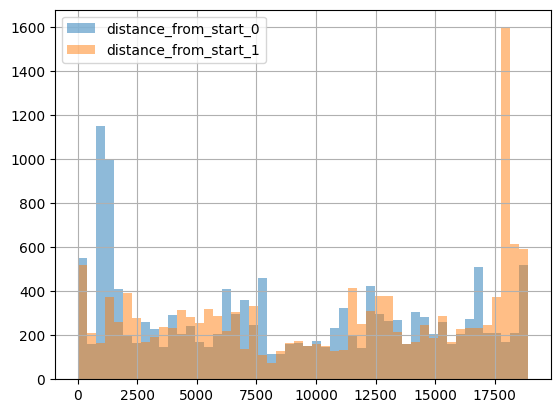

In [57]:
# Plot a histogram of distance_from_start_0 and distance_from_start_1
gps.gps_df["distance_from_start_0"].hist(bins=50, alpha=0.5, label="distance_from_start_0")
gps.gps_df["distance_from_start_1"].hist(bins=50, alpha=0.5, label="distance_from_start_1")
plt.legend()
plt.show()

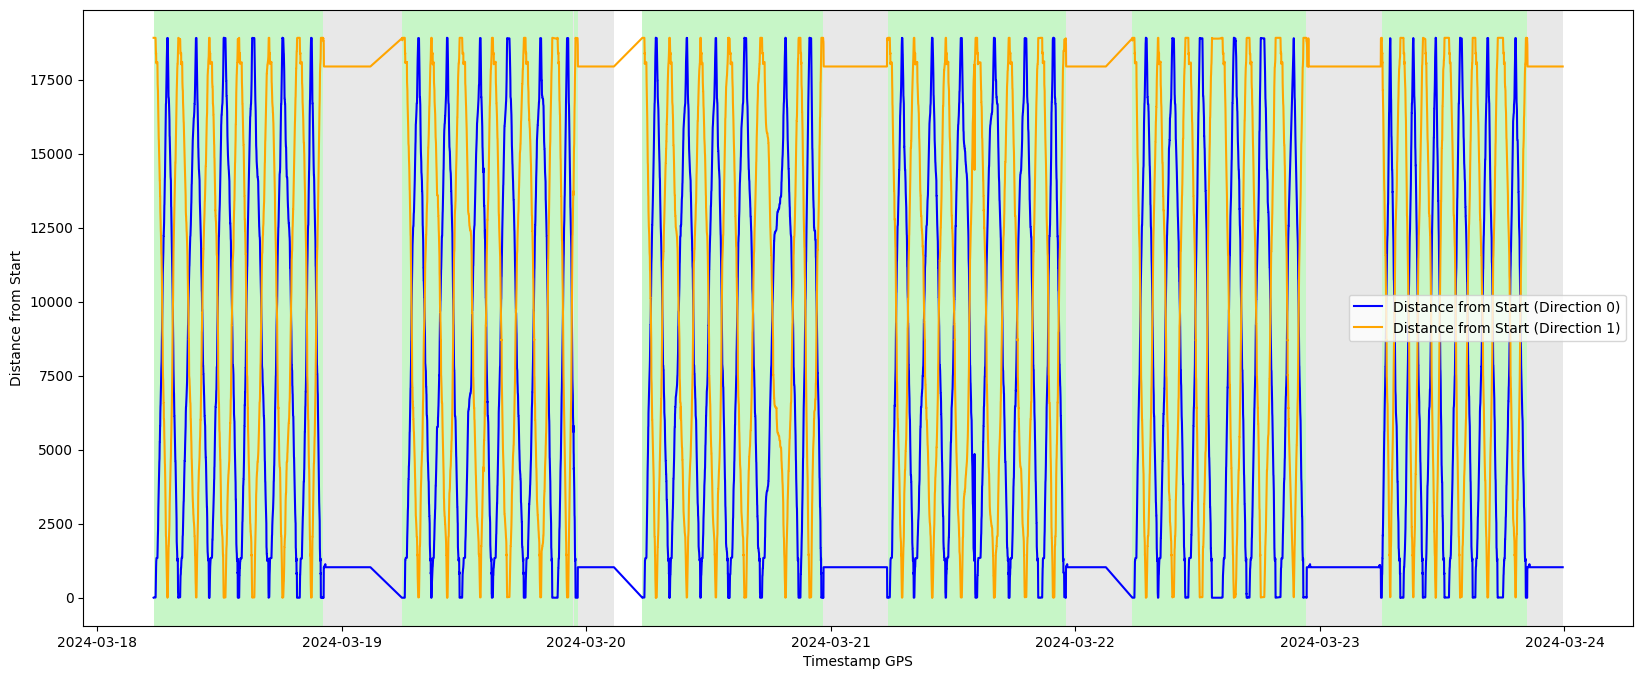

In [58]:
# Assuming gps.gps_df is your DataFrame and it's already loaded
df = gps.gps_df

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'in_route' column and create a colormap
colors = {True: 'lightgreen', False: 'lightgrey'}  # Modify colors as needed

# Group by 'in_route' status and apply coloring
in_route = df['in_route'].to_numpy()

# Find indices where 'in_route' changes
change_indices = np.where(in_route[:-1] != in_route[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(in_route)]))

# Apply coloring to the background based on 'in_route' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[in_route[start]], alpha=0.5)

# Add legend and labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')
ax.legend()

# Show plot
plt.show()

In [59]:
# Assign the direction and direction inference to each GPS point
df['direction'], df['direction_directly_infered'] = utils.assign_direction(df['in_route'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy(), N=3)

df['direction_directly_infered'].value_counts()

direction_directly_infered
False    13669
True       488
Name: count, dtype: int64

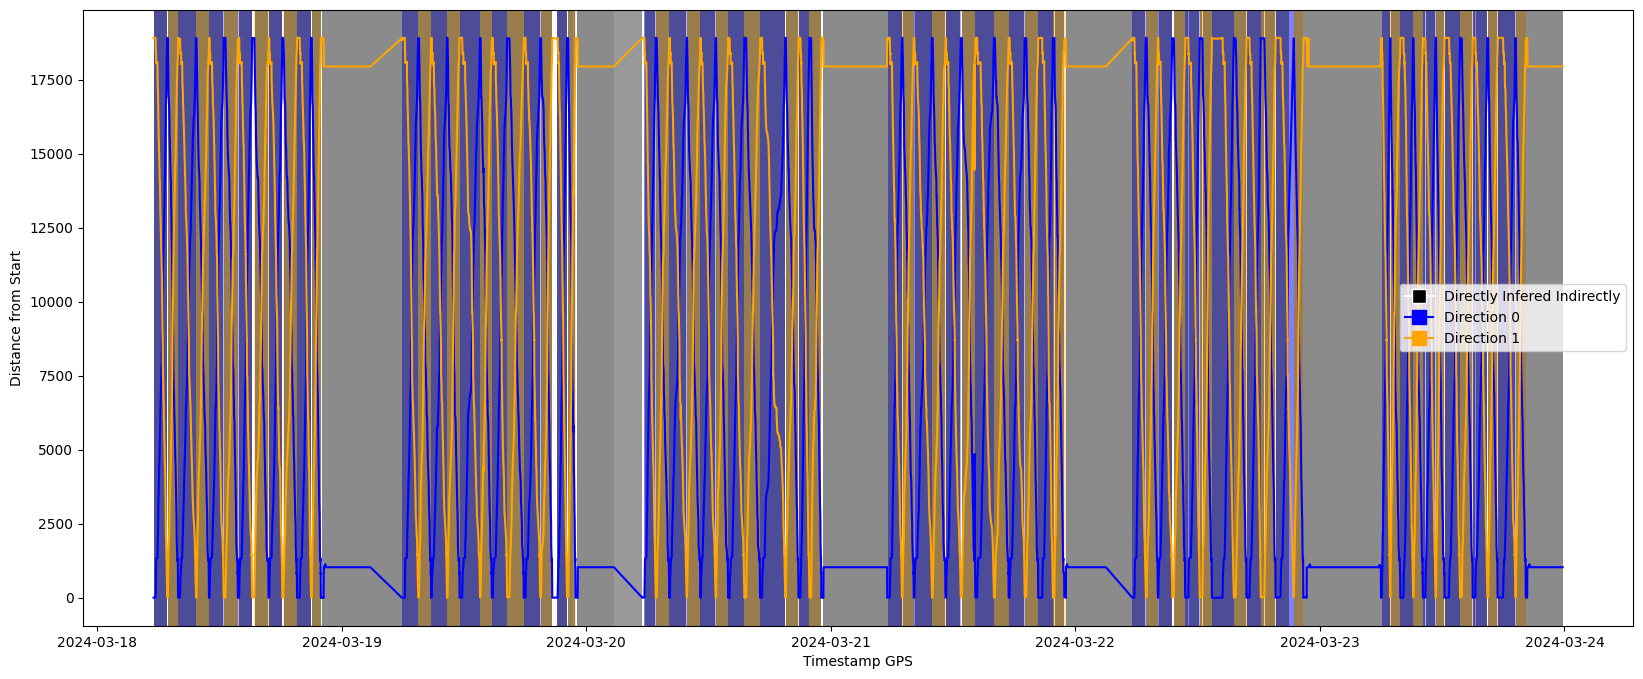

0: [0:177]
1: [177:336]
0: [336:566]
1: [566:752]
0: [752:957]
1: [957:1157]
0: [1157:1159]
1: [1159:1160]
0: [1160:1345]
1: [1345:1551]
0: [1551:1747]
1: [1747:1941]
0: [1941:2116]
1: [2116:2253]
-1: [2253:2401]
0: [2401:2594]
1: [2594:2776]
0: [2776:3000]
1: [3000:3176]
0: [3176:3430]
1: [3430:3489]
-1: [3489:3490]
1: [3490:3610]
0: [3610:3817]
1: [3817:4047]
0: [4047:4259]
1: [4259:4424]
0: [4424:4572]
1: [4572:4653]
-1: [4653:4673]
1: [4673:4701]
-1: [4701:4816]
1: [4816:4819]
0: [4819:4988]
1: [4988:5174]
0: [5174:5421]
1: [5421:5615]
0: [5615:5835]
1: [5835:6010]
0: [6010:6232]
1: [6232:6435]
0: [6435:6762]
1: [6762:6942]
0: [6942:7083]
1: [7083:7242]
-1: [7242:7367]
0: [7367:7557]
1: [7557:7729]
0: [7729:7991]
1: [7991:8187]
0: [8187:8405]
1: [8405:8597]
0: [8597:8840]
1: [8840:9045]
0: [9045:9264]
1: [9264:9448]
0: [9448:9612]
1: [9612:9772]
-1: [9772:9873]
0: [9873:10042]
1: [10042:10207]
0: [10207:10416]
1: [10416:10589]
0: [10589:10763]
1: [10763:10911]
0: [10911:11094]
1: [

In [60]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [61]:
df['timestamp_gps_seconds'] = df['timestamp_gps'].astype(np.int64) / 10**9
df['timestamp_gps_seconds']

0        1.710740e+09
1        1.710740e+09
2        1.710740e+09
3        1.710740e+09
4        1.710741e+09
             ...     
14152    1.711231e+09
14153    1.711232e+09
14154    1.711234e+09
14155    1.711236e+09
14156    1.711238e+09
Name: timestamp_gps_seconds, Length: 14157, dtype: float64

In [62]:
df['distance_traveled'], df['cumulative_distance_traveled'], df['time_spent'], df['cumulative_time_spent'] = utils.assign_distance_traveled(df['timestamp_gps_seconds'].to_numpy(), df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy())

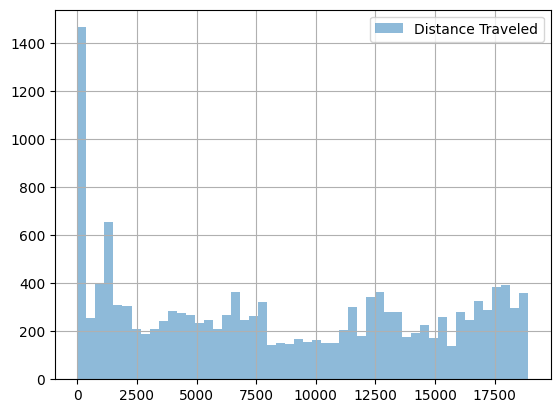

In [63]:
# Plot a histogram of the distance traveled
df['distance_traveled'].hist(bins=50, alpha=0.5, label='Distance Traveled')

plt.legend()
plt.show()

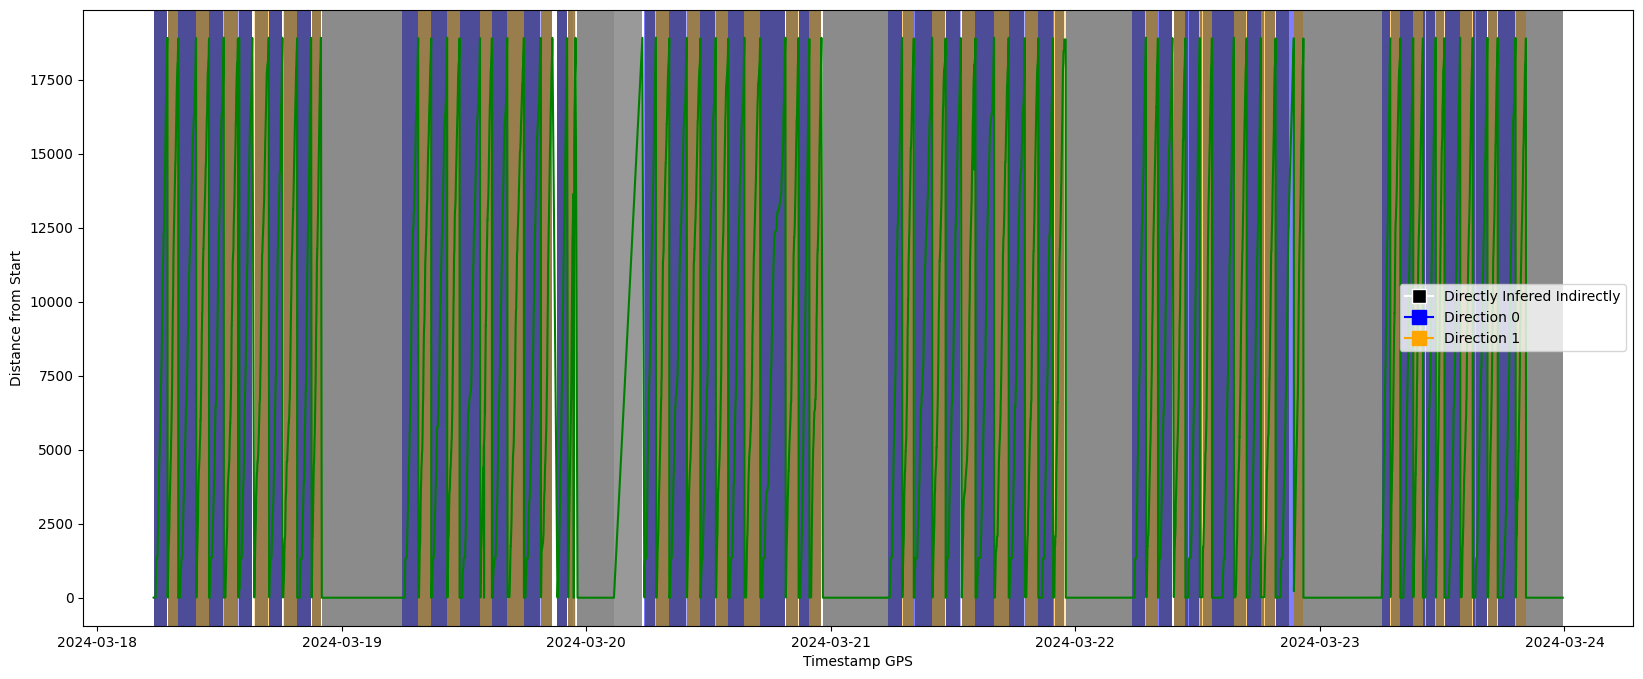

0: [0:177]
1: [177:336]
0: [336:566]
1: [566:752]
0: [752:957]
1: [957:1157]
0: [1157:1159]
1: [1159:1160]
0: [1160:1345]
1: [1345:1551]
0: [1551:1747]
1: [1747:1941]
0: [1941:2116]
1: [2116:2253]
-1: [2253:2401]
0: [2401:2594]
1: [2594:2776]
0: [2776:3000]
1: [3000:3176]
0: [3176:3430]
1: [3430:3489]
-1: [3489:3490]
1: [3490:3610]
0: [3610:3817]
1: [3817:4047]
0: [4047:4259]
1: [4259:4424]
0: [4424:4572]
1: [4572:4653]
-1: [4653:4673]
1: [4673:4701]
-1: [4701:4816]
1: [4816:4819]
0: [4819:4988]
1: [4988:5174]
0: [5174:5421]
1: [5421:5615]
0: [5615:5835]
1: [5835:6010]
0: [6010:6232]
1: [6232:6435]
0: [6435:6762]
1: [6762:6942]
0: [6942:7083]
1: [7083:7242]
-1: [7242:7367]
0: [7367:7557]
1: [7557:7729]
0: [7729:7991]
1: [7991:8187]
0: [8187:8405]
1: [8405:8597]
0: [8597:8840]
1: [8840:9045]
0: [9045:9264]
1: [9264:9448]
0: [9448:9612]
1: [9612:9772]
-1: [9772:9873]
0: [9873:10042]
1: [10042:10207]
0: [10207:10416]
1: [10416:10589]
0: [10589:10763]
1: [10763:10911]
0: [10911:11094]
1: [

In [64]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_traveled = df['distance_traveled'].to_numpy()

ax.plot(timestamp, distance_traveled, label='Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

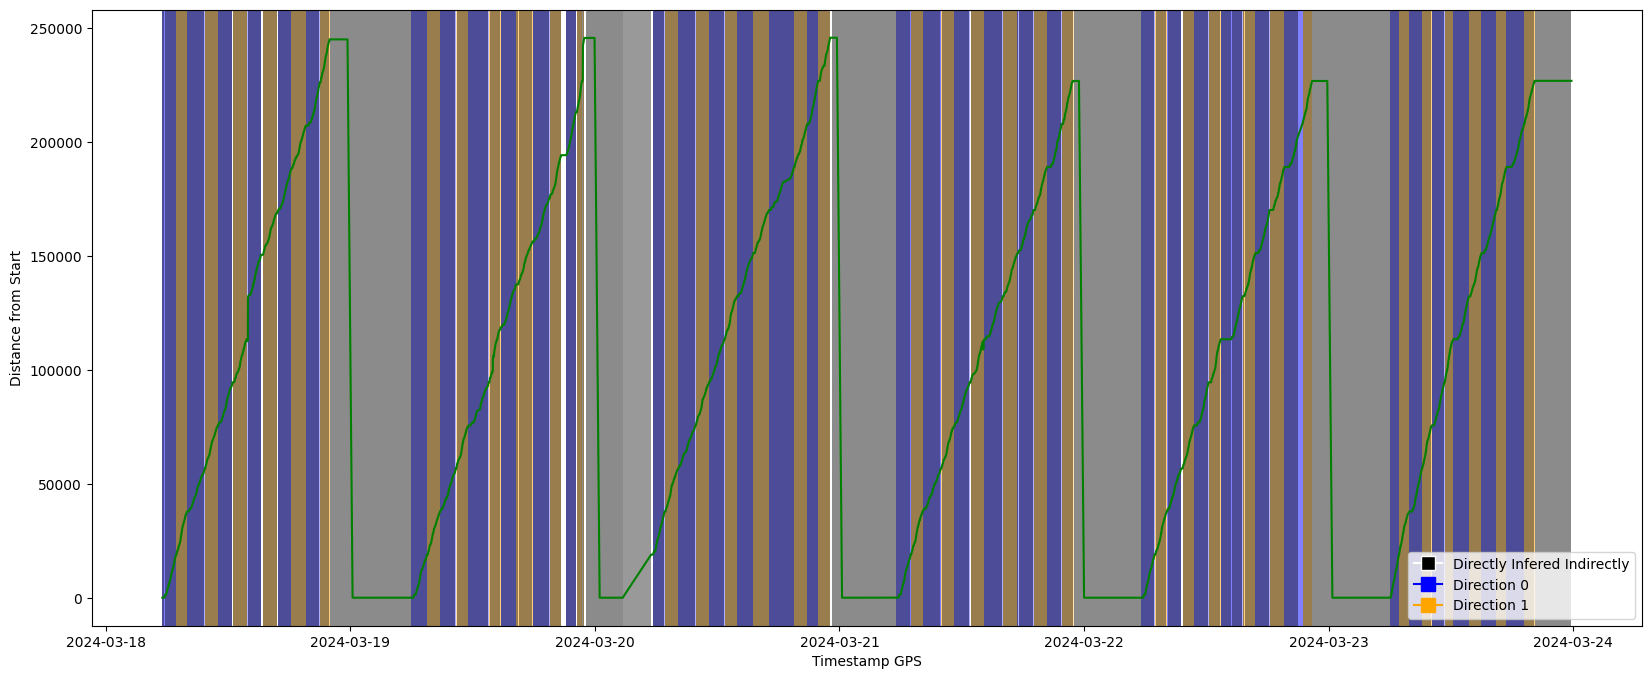

0: [0:177]
1: [177:336]
0: [336:566]
1: [566:752]
0: [752:957]
1: [957:1157]
0: [1157:1159]
1: [1159:1160]
0: [1160:1345]
1: [1345:1551]
0: [1551:1747]
1: [1747:1941]
0: [1941:2116]
1: [2116:2253]
-1: [2253:2401]
0: [2401:2594]
1: [2594:2776]
0: [2776:3000]
1: [3000:3176]
0: [3176:3430]
1: [3430:3489]
-1: [3489:3490]
1: [3490:3610]
0: [3610:3817]
1: [3817:4047]
0: [4047:4259]
1: [4259:4424]
0: [4424:4572]
1: [4572:4653]
-1: [4653:4673]
1: [4673:4701]
-1: [4701:4816]
1: [4816:4819]
0: [4819:4988]
1: [4988:5174]
0: [5174:5421]
1: [5421:5615]
0: [5615:5835]
1: [5835:6010]
0: [6010:6232]
1: [6232:6435]
0: [6435:6762]
1: [6762:6942]
0: [6942:7083]
1: [7083:7242]
-1: [7242:7367]
0: [7367:7557]
1: [7557:7729]
0: [7729:7991]
1: [7991:8187]
0: [8187:8405]
1: [8405:8597]
0: [8597:8840]
1: [8840:9045]
0: [9045:9264]
1: [9264:9448]
0: [9448:9612]
1: [9612:9772]
-1: [9772:9873]
0: [9873:10042]
1: [10042:10207]
0: [10207:10416]
1: [10416:10589]
0: [10589:10763]
1: [10763:10911]
0: [10911:11094]
1: [

In [65]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
cumulative_distance_traveled = df['cumulative_distance_traveled'].to_numpy()

ax.plot(timestamp, cumulative_distance_traveled, label='Cumulative Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [66]:
df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,in_route,distance_from_start_0,distance_from_start_1,direction,direction_directly_infered,timestamp_gps_seconds,distance_traveled,cumulative_distance_traveled,time_spent,cumulative_time_spent
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,...,True,3.785178,18910.259766,0,False,1.710740e+09,3.785178,3.785178,0,0
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,...,True,4.320151,18910.259766,0,False,1.710740e+09,4.320151,4.320151,11,11
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,...,True,5.772221,18910.259766,0,False,1.710740e+09,5.772221,5.772221,73,84
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,...,True,8.440000,18910.259766,0,False,1.710740e+09,8.440000,8.440000,22,106
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,...,True,6.689317,18910.259766,0,False,1.710741e+09,6.689317,6.689317,566,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,2024-03-23 21:49:29,2024-03-23,21:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,False,1030.199951,17942.060547,-1,False,1.711231e+09,0.000000,226765.769531,1800,5799
14153,2024-03-23 22:19:29,2024-03-23,22:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,False,1030.199951,17942.060547,-1,False,1.711232e+09,0.000000,226765.769531,1800,7599
14154,2024-03-23 22:49:29,2024-03-23,22:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,False,1030.199951,17942.060547,-1,False,1.711234e+09,0.000000,226765.769531,1800,9399
14155,2024-03-23 23:19:29,2024-03-23,23:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,False,1030.199951,17942.060547,-1,False,1.711236e+09,0.000000,226765.769531,1800,11199


In [67]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [68]:
gtfs.get_stops_by_direction()

In [69]:
gtfs.stops_by_direction

[      stop_sequence       stop_id  stop_distance  direction_id shape_id  \
 0                 0  2033O00100C0           0.00             0     gnoq   
 57                1  2033O00211C0         354.51             0     gnoq   
 88                2  2033O00212C0         636.83             0     gnoq   
 119               3  2033O00177C0        1255.20             0     gnoq   
 150               4  2033O00181C0        1715.36             0     gnoq   
 ...             ...           ...            ...           ...      ...   
 1855             59  2028O00018C0       17884.95             0     gnoq   
 1886             60  2028O00019C0       18146.96             0     gnoq   
 1917             61  2028O00020C0       18270.31             0     gnoq   
 1948             62  2028O00021C0       18452.15             0     gnoq   
 1979             63  2028O00001C0       18913.66             0     gnoq   
 
                                  stop_name   stop_lat   stop_lon  \
 0     Ponto Fina

In [70]:
gtfs.stops_distances_by_direction

[array([    0.  ,   354.51,   636.83,  1255.2 ,  1715.36,  1928.52,
         2118.75,  2398.78,  2635.71,  2916.32,  3157.51,  3438.28,
         3780.63,  3932.73,  4297.04,  4616.7 ,  4912.81,  5164.51,
         5607.03,  6227.58,  6441.58,  6816.3 ,  7006.32,  7284.34,
         7478.45,  7700.13,  7991.87,  8236.1 ,  8692.06,  9135.26,
         9394.19,  9695.1 ,  9968.64, 10201.03, 10351.09, 10480.63,
        10888.38, 11053.36, 11473.67, 11659.9 , 12217.91, 12582.09,
        12991.72, 13259.19, 13534.4 , 13728.36, 13986.49, 14338.3 ,
        14801.07, 15187.22, 15439.34, 15701.68, 16017.13, 16321.33,
        16759.65, 16971.07, 17155.34, 17516.3 , 17702.51, 17884.95,
        18146.96, 18270.31, 18452.15, 18913.66]),
 array([    0.  ,   538.15,   648.  ,   765.24,   990.16,  1175.79,
         1400.99,  1594.27,  2047.21,  2394.54,  2656.59,  2948.01,
         3296.92,  3521.03,  3882.85,  4288.67,  4611.26,  4764.49,
         5072.04,  5371.83,  5651.31,  5772.71,  6030.84,  6640.92

In [71]:
df['last_stop_index'], df['next_stop_index'], df['last_stop_distance'], df['next_stop_distance'] = utils.assign_stops(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_traveled'].to_numpy(), gtfs.stops_distances_by_direction)

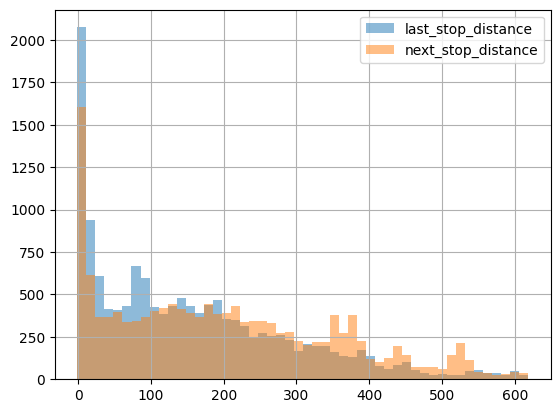

In [72]:
# Plot a histogram of the last_stop_distance and next_stop_distance
df['last_stop_distance'].hist(bins=50, alpha=0.5, label='last_stop_distance')
df['next_stop_distance'].hist(bins=50, alpha=0.5, label='next_stop_distance')

plt.legend()
plt.show()

In [73]:
import src.utils as utils
importlib.reload(utils)


timestamp_array = df['timestamp_gps'].to_numpy()
# Convert timestamp_gps to seconds
timestamp_seconds = (timestamp_array).astype('int64') // 10**9

df['mean_speed_1_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=1)
df['mean_speed_3_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=3)
df['mean_speed_5_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=5)

display(df)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,cumulative_distance_traveled,time_spent,cumulative_time_spent,last_stop_index,next_stop_index,last_stop_distance,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,...,3.785178,0,0,0,1,3.785178,350.724823,0.000000,0.000000,0.000000
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,...,4.320151,11,11,0,1,4.320151,350.189850,0.175082,0.175082,0.175082
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,...,5.772221,73,84,0,1,5.772221,348.737793,0.071609,0.085159,0.085159
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,...,8.440000,22,106,0,1,8.440000,346.070007,0.156121,0.158088,0.158088
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,...,6.689317,566,672,0,1,6.689317,347.820679,-0.011135,-0.011135,-0.011135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,2024-03-23 21:49:29,2024-03-23,21:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,5799,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14153,2024-03-23 22:19:29,2024-03-23,22:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,7599,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14154,2024-03-23 22:49:29,2024-03-23,22:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,9399,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14155,2024-03-23 23:19:29,2024-03-23,23:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,11199,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000


In [74]:
mean_speeds = df[['mean_speed_1_min', 'mean_speed_3_min', 'mean_speed_5_min']].to_numpy()

df_validation = utils.virtualize_stop_points(df['timestamp_gps'].to_numpy(), df['in_route'].to_numpy(), df['direction'].to_numpy(), df['last_stop_index'].to_numpy(), df['next_stop_index'].to_numpy(), df['distance_traveled'].to_numpy(), df['cumulative_distance_traveled'].to_numpy(), mean_speeds, gtfs.stops_distances_by_direction, VEHICLE, ROUTE)

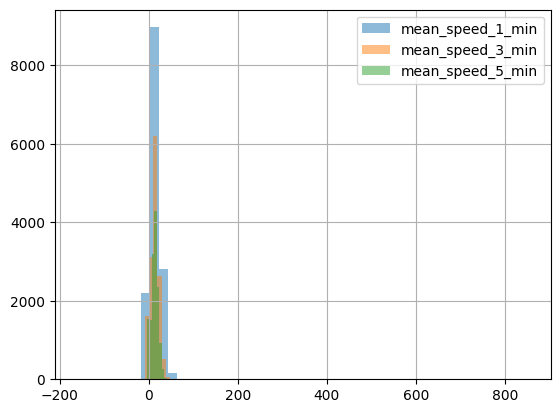

In [75]:
# Generate a histogram of mean_speed_1_min, mean_speed_3_min and mean_speed_5_min
df['mean_speed_1_min'].hist(bins=50, alpha=0.5, label='mean_speed_1_min')
df['mean_speed_3_min'].hist(bins=50, alpha=0.5, label='mean_speed_3_min')
df['mean_speed_5_min'].hist(bins=50, alpha=0.5, label='mean_speed_5_min')

plt.legend()
plt.show()

In [79]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df)

display(df)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,cumulative_distance_traveled,time_spent,cumulative_time_spent,last_stop_index,next_stop_index,last_stop_distance,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-03-18 05:33:24,2024-03-18,05:33:24,A71551,409,-22.93146,-43.23429,False,NaN,Parado fora trajeto,...,3.785178,0,0,0,1,3.785178,350.724823,0.000000,0.000000,0.000000
1,2024-03-18 05:33:35,2024-03-18,05:33:35,A71551,409,-22.93145,-43.23429,False,NaN,Parado fora trajeto,...,4.320151,11,11,0,1,4.320151,350.189850,0.175082,0.175082,0.175082
2,2024-03-18 05:34:48,2024-03-18,05:34:48,A71551,409,-22.93144,-43.23428,False,NaN,Parado fora trajeto,...,5.772221,73,84,0,1,5.772221,348.737793,0.071609,0.085159,0.085159
3,2024-03-18 05:35:10,2024-03-18,05:35:10,A71551,409,-22.93143,-43.23424,False,NaN,Parado fora trajeto,...,8.440000,22,106,0,1,8.440000,346.070007,0.156121,0.158088,0.158088
4,2024-03-18 05:44:36,2024-03-18,05:44:36,A71551,409,-22.93144,-43.23427,False,NaN,Parado fora trajeto,...,6.689317,566,672,0,1,6.689317,347.820679,-0.011135,-0.011135,-0.011135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,2024-03-23 21:49:29,2024-03-23,21:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,5799,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14153,2024-03-23 22:19:29,2024-03-23,22:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,7599,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14154,2024-03-23 22:49:29,2024-03-23,22:49:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,9399,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000
14155,2024-03-23 23:19:29,2024-03-23,23:19:29,A71551,409,-22.88874,-43.29299,False,garagem,Parado garagem,...,226765.769531,1800,11199,-1,-1,-1.000000,-1.000000,0.000000,0.000000,0.000000


In [77]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(df_validation)

display(df_validation)

,timestamp_gps,data,hora,id_veiculo,servico,direction,cumulative_distance_traveled,current_stop_index,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-03-18 05:45:57.713553653,2024-03-18,05:45:57,A71551,409,0,354.510000,1,282.32,28.908787,2.673680,2.673680
1,2024-03-18 05:46:40.749482444,2024-03-18,05:46:40,A71551,409,0,636.830000,2,618.37,25.983403,3.328570,3.328570
2,2024-03-18 05:49:21.447494927,2024-03-18,05:49:21,A71551,409,0,1255.200000,3,460.16,4.098542,13.072060,15.151200
3,2024-03-18 05:57:07.226999895,2024-03-18,05:57:07,A71551,409,0,1715.360000,4,213.16,24.264864,10.336524,6.269695
4,2024-03-18 05:57:34.824292518,2024-03-18,05:57:34,A71551,409,0,1928.520000,5,190.23,26.184119,13.657289,8.281137
...,...,...,...,...,...,...,...,...,...,...,...,...
4296,2024-03-23 20:05:27.690098788,2024-03-23,20:05:27,A71551,409,1,225117.955156,53,399.53,23.651133,20.804980,18.456199
4297,2024-03-23 20:06:26.560553244,2024-03-23,20:06:26,A71551,409,1,225517.485156,54,223.47,15.002695,19.672612,16.891377
4298,2024-03-23 20:07:40.224736717,2024-03-23,20:07:40,A71551,409,1,225740.955156,55,607.55,11.283047,17.236248,18.051054
4299,2024-03-23 20:11:39.461359862,2024-03-23,20:11:39,A71551,409,1,226348.505156,56,232.05,24.106172,12.289336,10.340625


In [78]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # display(df)